<a href="https://colab.research.google.com/github/Gabrieldiasdeoliveira/Analise-Bayesiana/blob/main/Atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 2 Trabalho – Processos Estocásticos



1) Os dados abaixo foram extraídos do Site do DATASUS – com relação ao número de
casos de Aids no Brasil de 2001 a 2009. Os dados estão distribuídos em:
a) Total no Brasil
b) Total no Brasil (separado por sexo Feminino e Masculino)
c) Total em São Paulo
d) Total em São Paulo (separados por sexo: Feminino e Masculino)
e) Total de casos de Aids no Rio de Janeiro
f) Total de casos de Aids no Rio de Janeiro (separados por sexo Masc. e Fem.)

In [51]:
# Criando a base de dados com os dados fornecidos
dados <- data.frame(
  Ano = c(2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001),
  soma_Brasil = c(191481045, 189612814, 189335191, 186770560, 184184264, 181586030, 176871437, 174632960, 172381455),
  Feminino = c(97430444, 96453502, 96293080, 94954834, 93679912, 92334905, 89871896, 88735474, 87569890),
  Masculino = c(94050601, 93159312, 93042111, 91815726, 90504352, 89251125, 86999541, 85897486, 84811565),
  sao_paulo = c(41384089, 41011635, 41663568, 41055735, 40442795, 39827022, 38709320, 38177742, 37645298),
  feminino_sp = c(21239073, 21033978, 21351021, 20989010, 20723077, 20392848, 19793451, 19508378, 19222839),
  masculino_sp = c(20145016, 19977657, 20312547, 20066725, 19719718, 19434174, 18915869, 18669364, 18422459),
  rio_de_janeiro = c(16010386, 15872362, 15738536, 15561721, 15383407, 15204272, 14879118, 14724475, 14569580),
  feminino_rj = c(8353084, 8278005, 8207201, 8107776, 8030921, 7933497, 7756659, 7672556, 7588315),
  masculino_rj = c(7657302, 7594357, 7531335, 7453945, 7352486, 7270775, 7122459, 7051919, 6981265)
)

# Exibindo a base de dados criada
dados


Ano,soma_Brasil,Feminino,Masculino,sao_paulo,feminino_sp,masculino_sp,rio_de_janeiro,feminino_rj,masculino_rj
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2009,191481045,97430444,94050601,41384089,21239073,20145016,16010386,8353084,7657302
2008,189612814,96453502,93159312,41011635,21033978,19977657,15872362,8278005,7594357
2007,189335191,96293080,93042111,41663568,21351021,20312547,15738536,8207201,7531335
2006,186770560,94954834,91815726,41055735,20989010,20066725,15561721,8107776,7453945
2005,184184264,93679912,90504352,40442795,20723077,19719718,15383407,8030921,7352486
2004,181586030,92334905,89251125,39827022,20392848,19434174,15204272,7933497,7270775
2003,176871437,89871896,86999541,38709320,19793451,18915869,14879118,7756659,7122459
2002,174632960,88735474,85897486,38177742,19508378,18669364,14724475,7672556,7051919
2001,172381455,87569890,84811565,37645298,19222839,18422459,14569580,7588315,6981265


a) Gráficos de dispersão destes dados → verifiquem se os dados estão crescendo
ou decrescendo (tanto em São Paulo, Rio de Janeiro e Brasil)

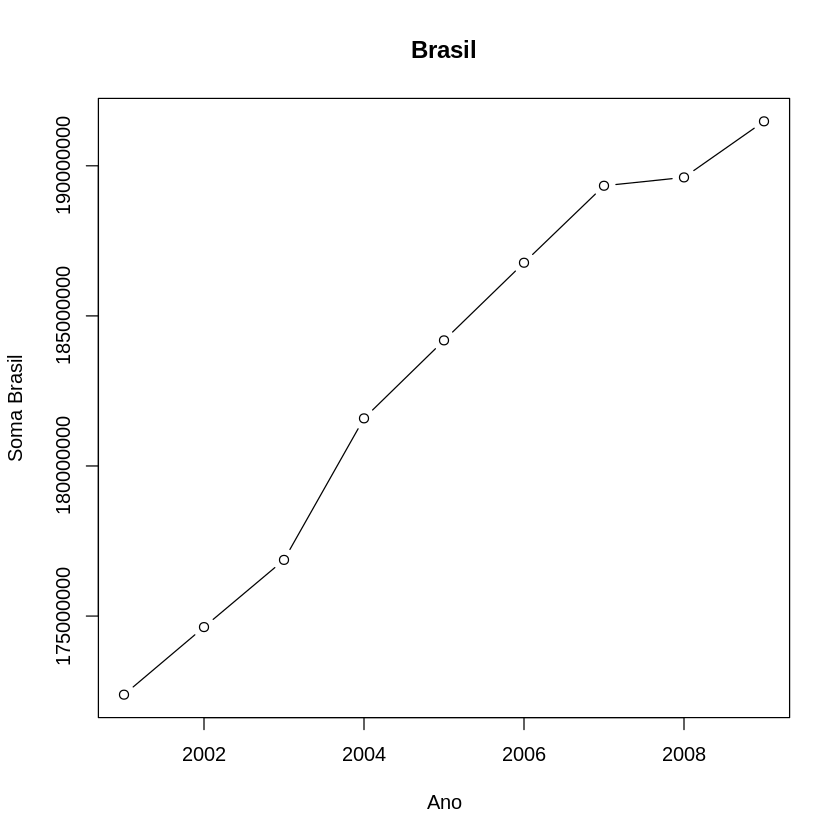

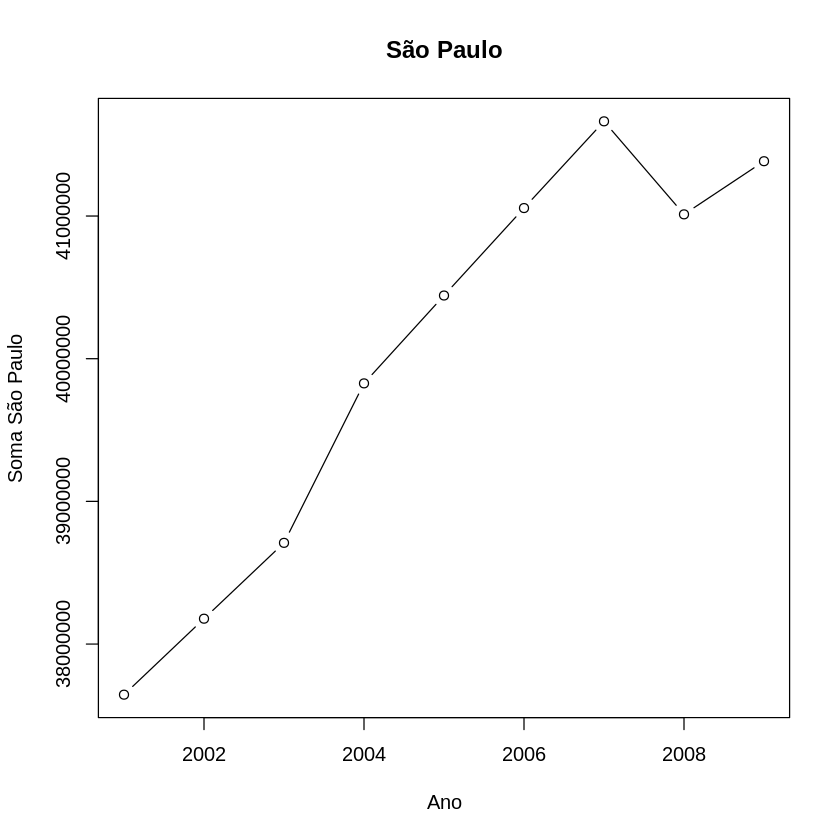

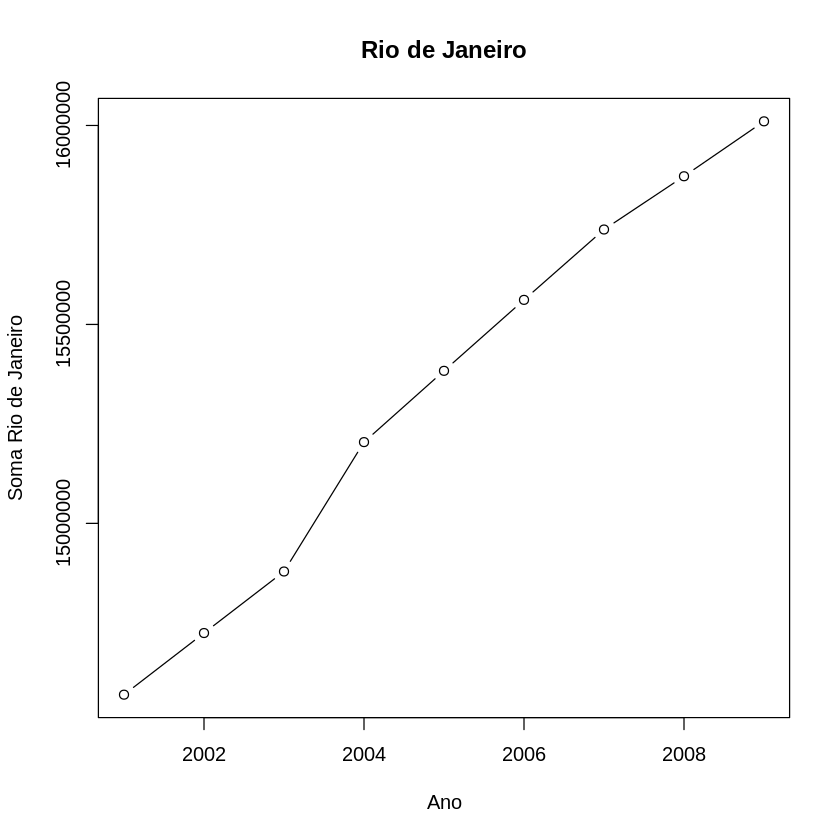

In [52]:
# Gráfico de dispersão para Brasil
plot(dados$Ano, dados$soma_Brasil, main = "Brasil", type = "b", xlab = "Ano", ylab = "Soma Brasil")

# Gráfico de dispersão para São Paulo
plot(dados$Ano, dados$sao_paulo, main = "São Paulo", type = "b", xlab = "Ano", ylab = "Soma São Paulo")

# Gráfico de dispersão para Rio de Janeiro
plot(dados$Ano, dados$rio_de_janeiro, main ="Rio de Janeiro", type = "b", xlab = "Ano", ylab = "Soma Rio de Janeiro")


b) Faça a separação dos dados por sexo: veja se há crescimento ou decrescimento
destes valores com o aumento dos anos.

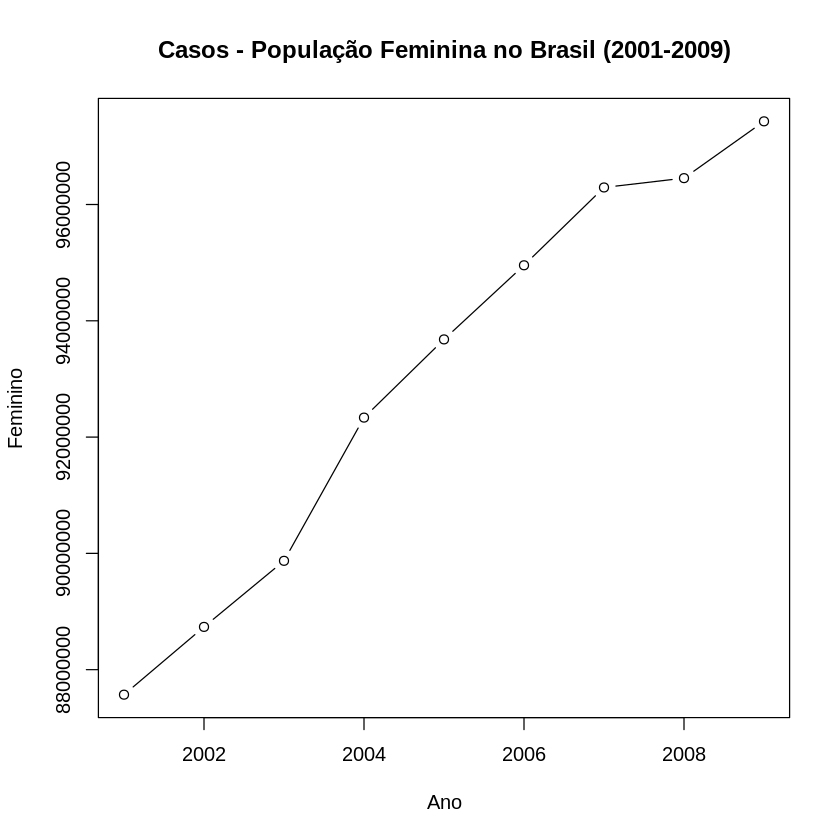

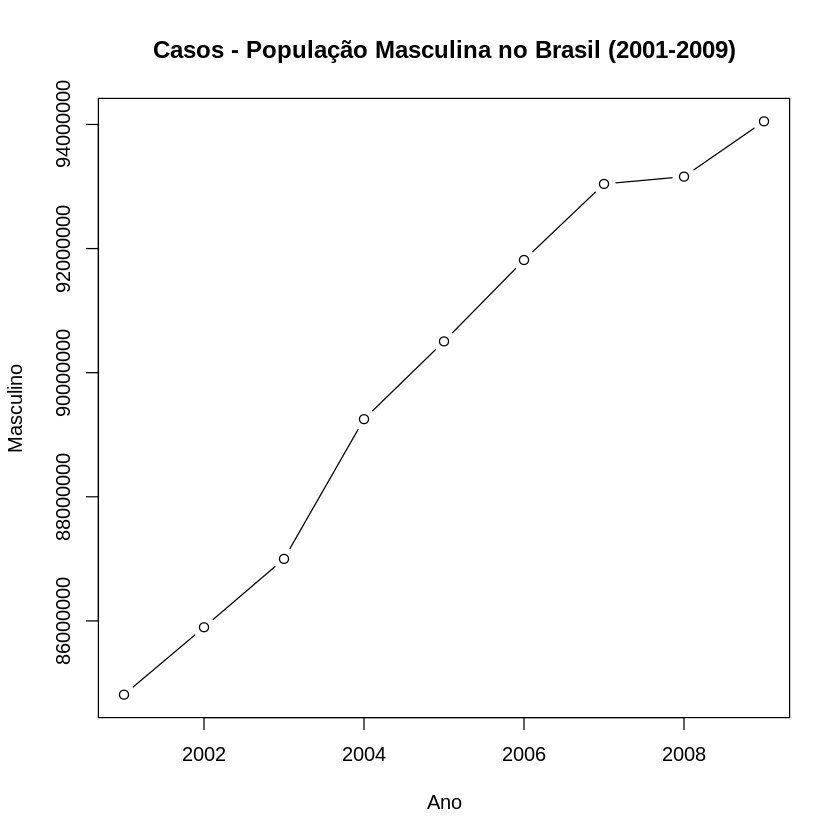

In [53]:
# Gráfico de dispersão para Brasil - Feminino e Masculino
options(scipen = 999)
plot(dados$Ano, dados$Feminino, type = "b", xlab = "Ano", ylab = "Feminino", main = "Casos - População Feminina no Brasil (2001-2009)")
plot(dados$Ano, dados$Masculino, type = "b", xlab = "Ano", ylab = "Masculino", main = "Casos - População Masculina no Brasil (2001-2009)")


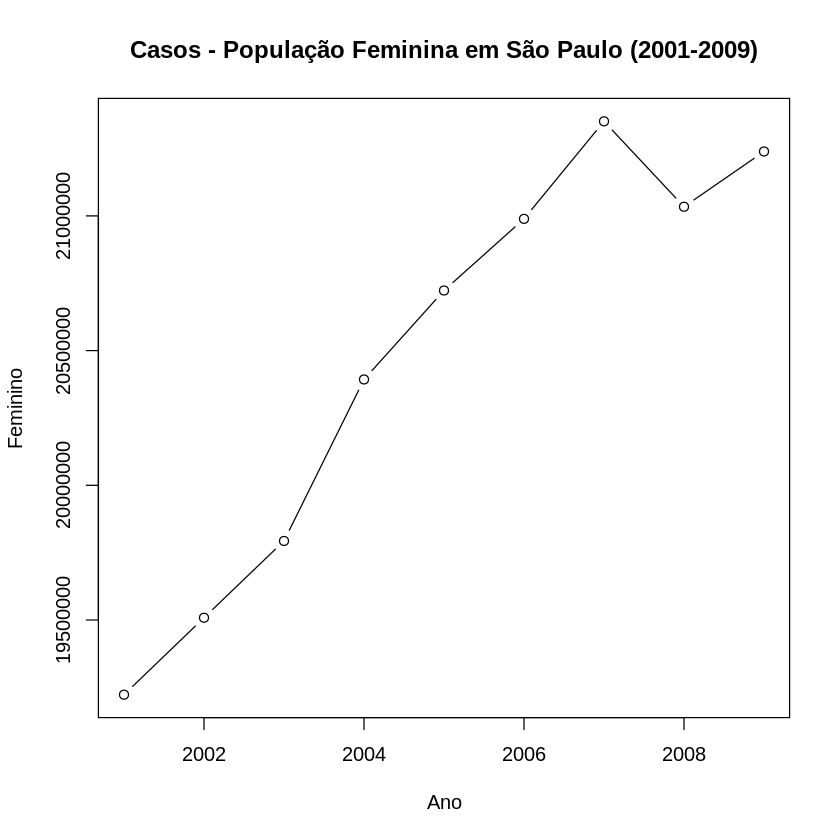

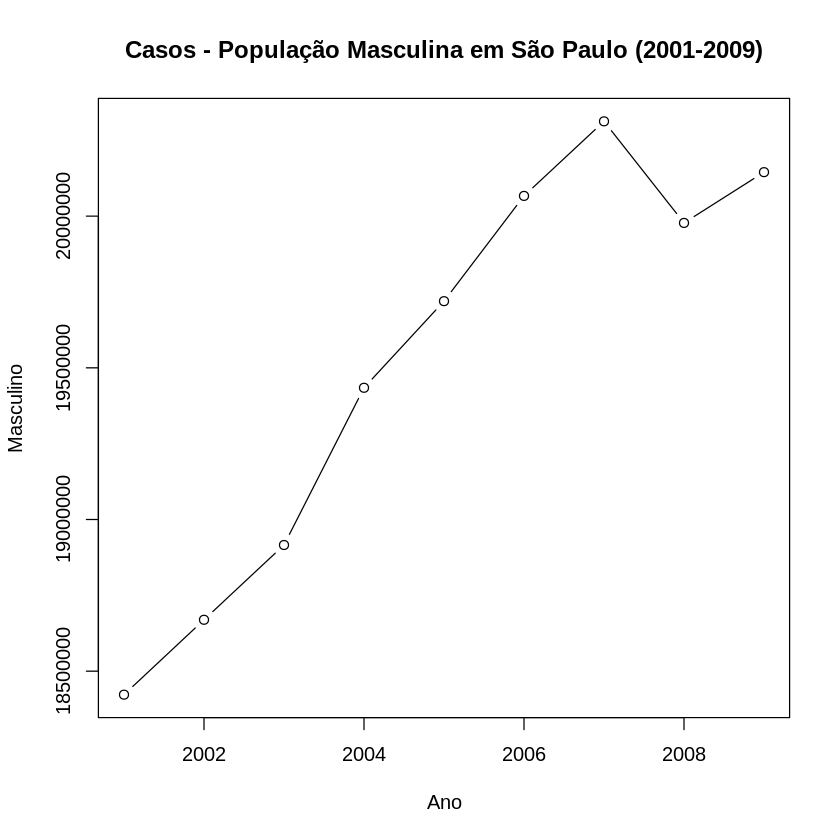

In [47]:
# Gráfico de dispersão para São Paulo - Feminino
plot(dados$Ano, dados$feminino_sp, type = "b", xlab = "Ano", ylab = "Feminino", main = "Casos - População Feminina em São Paulo (2001-2009)")
# Gráfico de dispersão para São Paulo - Masculino
plot(dados$Ano, dados$masculino_sp, type = "b", xlab = "Ano", ylab = "Masculino", main = "Casos - População Masculina em São Paulo (2001-2009)")



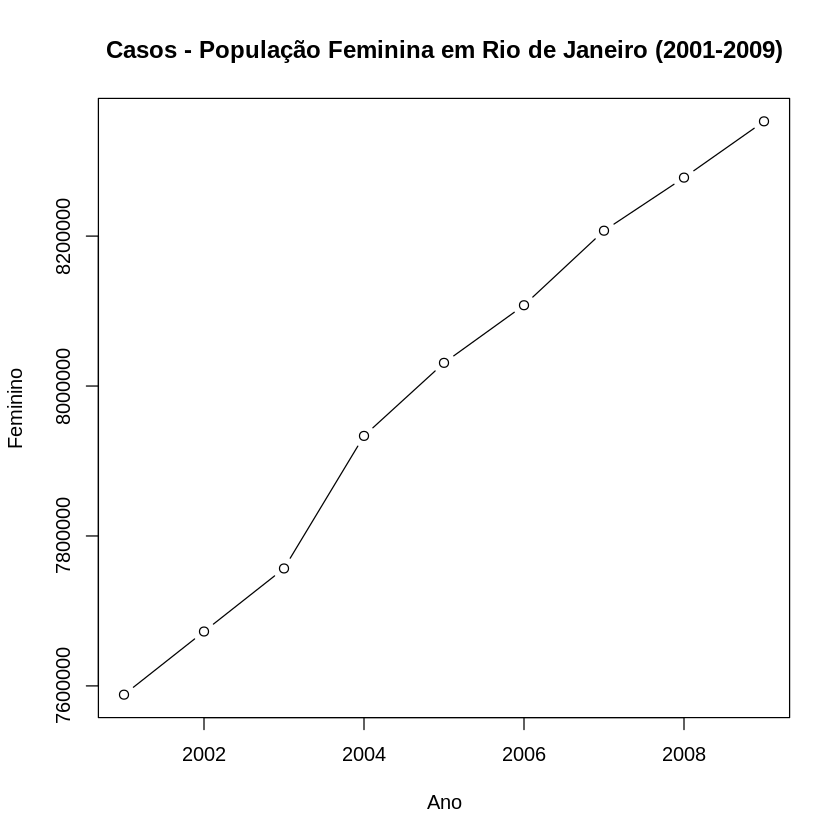

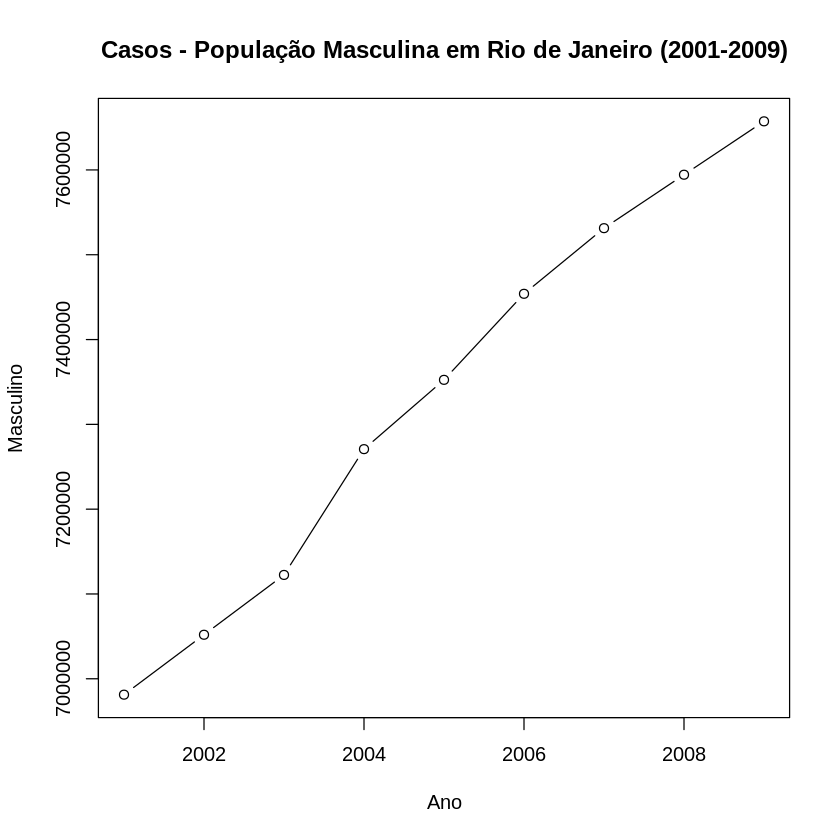

In [48]:
# Gráfico de dispersão para São Paulo - Feminino
plot(dados$Ano, dados$feminino_rj, type = "b", xlab = "Ano", ylab = "Feminino", main = "Casos - População Feminina em Rio de Janeiro (2001-2009)")
# Gráfico de dispersão para São Paulo - Masculino
plot(dados$Ano, dados$masculino_rj, type = "b", xlab = "Ano", ylab = "Masculino", main = "Casos - População Masculina em Rio de Janeiro (2001-2009)")


c) Calcule a porcentagem dos casos em SP em relação ao Brasil → qual a
porcentagem de casos em SP em relação ao Brasil. (faça no total e por sexo
(feminino e masculino)). Faça um comparativo → veja se o crescimento está
maior entre as mulheres ou entre os homens.

In [101]:
# calcular a porcentagem dos casos em SP em relação ao Brasil
porcentagem_sp <- (dados$sao_paulo / dados$soma_Brasil) * 100


Tabela pelo Total

In [102]:
# criação da tabela pelo total
tabela <- data.frame(Ano = dados$Ano, `Casos em SP` = dados$sao_paulo,
`Casos no Brasil` = dados$soma_Brasil, `Porcentagem em SP` = porcentagem_sp_total)
row.names(tabela) <- NULL

# impressão da tabela
print(tabela)

   Ano Casos.em.SP Casos.no.Brasil Porcentagem.em.SP
1 2009    41384089       191481045             21.61
2 2008    41011635       189612814             21.63
3 2007    41663568       189335191             22.01
4 2006    41055735       186770560             21.98
5 2005    40442795       184184264             21.96
6 2004    39827022       181586030             21.93
7 2003    38709320       176871437             21.89
8 2002    38177742       174632960             21.86
9 2001    37645298       172381455             21.84


Tabela por sexo (feminino e masculino)





In [103]:
# calcular a porcentagem dos casos feninonos em SP em relação ao Brasil
porcentagem_feminino_sp <- (dados$feminino_sp / dados$soma_Brasil) * 100
porcentagem_feminino_sp

[1] 11.09200 11.09312 11.27684 11.23786 11.25127 11.23041 11.19087 11.17107
[9] 11.15134

In [104]:
# criação da tabela de casos femininos em relação a São Paulo
tabela <- data.frame(Ano = dados$Ano, `Feminio SP` = dados$feminino_sp, 
`Casos no Brasil` = dados$soma_Brasil, `Porcentagem Feminino em SP` = porcentagem_feminino_sp)
row.names(tabela) <- NULL

# impressão da tabela
print(tabela)

   Ano Feminio.SP Casos.no.Brasil Porcentagem.Feminino.em.SP
1 2009   21239073       191481045                   11.09200
2 2008   21033978       189612814                   11.09312
3 2007   21351021       189335191                   11.27684
4 2006   20989010       186770560                   11.23786
5 2005   20723077       184184264                   11.25127
6 2004   20392848       181586030                   11.23041
7 2003   19793451       176871437                   11.19087
8 2002   19508378       174632960                   11.17107
9 2001   19222839       172381455                   11.15134


In [ ]:
# calcular a porcentagem dos casos masculinos em SP em relação ao Brasil
porcentagem_marculinos_sp <- (dados$masculino_sp / dados$soma_Brasil) * 100
porcentagem_marculinos_sp 



In [106]:
# criação da tabela pelo total
tabela <- data.frame(Ano = dados$Ano, `Masculino SP` = dados$masculino_sp, 
`Casos no Brasil` = dados$soma_Brasil, `Porcentagem Masculino em SP` = porcentagem_marculinos_sp)
row.names(tabela) <- NULL

# impressão da tabela
print(tabela)


   Ano Masculino.SP Casos.no.Brasil Porcentagem.Masculino.em.SP
1 2009     20145016       191481045                    10.52063
2 2008     19977657       189612814                    10.53603
3 2007     20312547       189335191                    10.72835
4 2006     20066725       186770560                    10.74405
5 2005     19719718       184184264                    10.70652
6 2004     19434174       181586030                    10.70246
7 2003     18915869       176871437                    10.69470
8 2002     18669364       174632960                    10.69063
9 2001     18422459       172381455                    10.68703


Faça um comparativo → veja se o crescimento está maior entre as mulheres ou entre os homens.

In [146]:
# Vetor com anos
anos <- dados$Ano


In [147]:
# Vetor com casos masculinos em cada ano
casos_masculinos <- dados$masculino_sp



In [148]:
# Vetor com casos femininos em cada ano
casos_femininos <- dados$feminino_sp



In [149]:
# Tabela com as informações
tabela_crescimento <- data.frame(Ano = anos,
                                 Casos_Masculinos = casos_masculinos,
                                 Casos_Femininos = casos_femininos)



In [150]:
# Coluna com o crescimento percentual entre um ano e outro para homens
tabela_crescimento$Crescimento_Masculino <- c(NA, diff(tabela_crescimento$Casos_Masculinos)/tabela_crescimento$Casos_Masculinos[-length(tabela_crescimento$Casos_Masculinos)]*100)



In [151]:
#Coluna com o crescimento percentual entre um ano e outro para mulheres
tabela_crescimento$Crescimento_Feminino <- c(NA, diff(tabela_crescimento$Casos_Femininos)/tabela_crescimento$Casos_Femininos[-length(tabela_crescimento$Casos_Femininos)]*100)

# Tabela
tabela_crescimento

Ano,Casos_Masculinos,Casos_Femininos,Crescimento_Masculino,Crescimento_Feminino
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2009,20145016,21239073,NA,NA
2008,19977657,21033978,-0.8307712,-0.9656495
2007,20312547,21351021,1.6763227,1.5072898
2006,20066725,20989010,-1.2101978,-1.6955208
2005,19719718,20723077,-1.7292657,-1.2670107
2004,19434174,20392848,-1.4480126,-1.5935327
2003,18915869,19793451,-2.6669773,-2.9392511
2002,18669364,19508378,-1.3031651,-1.4402390
2001,18422459,19222839,-1.3225143,-1.4636737


#Gráfico comparando as variáveis Crescimento Masculino e Crescimento Feminino

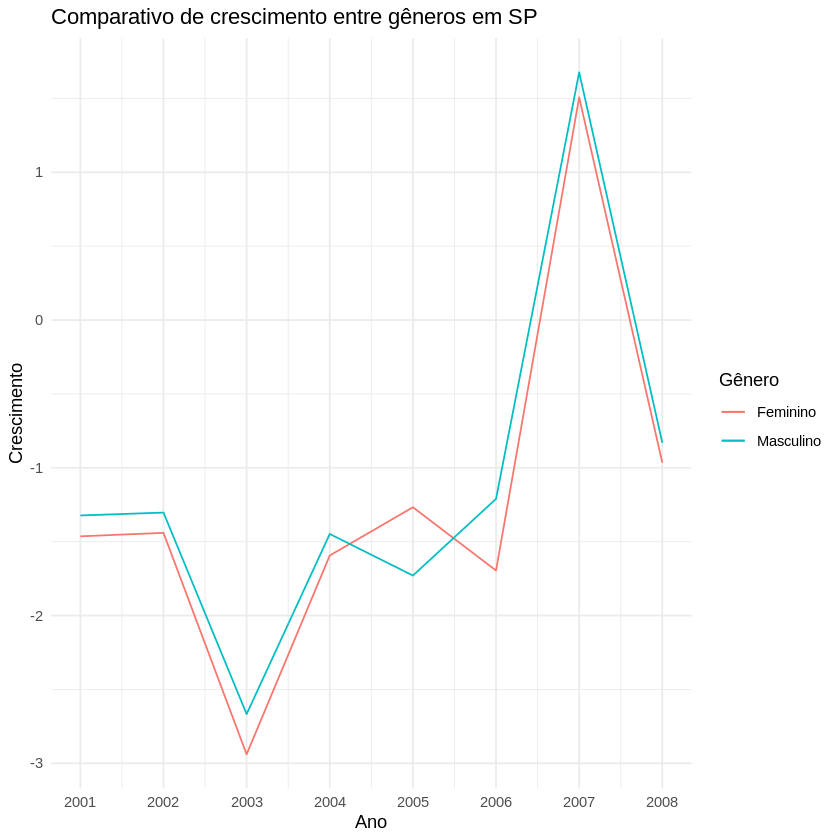

In [142]:
library(ggplot2)
library(dplyr)

# Filtrando os dados até 2008
dados_filtrados <- filter(tabela_crescimento, Ano <= 2008)

# Criando o gráfico
ggplot(dados_filtrados, aes(x = Ano, y = Crescimento_Feminino, color = "Feminino")) +
  geom_line() +
  geom_line(aes(y = Crescimento_Masculino, color = "Masculino")) +
  scale_x_continuous(limits = c(2001, 2008), breaks = seq(2001, 2008, 1)) +
  labs(title = "Comparativo de crescimento entre gêneros em SP",
       x = "Ano",
       y = "Crescimento",
       color = "Gênero") +
  theme_minimal()


d) Calcule a porcentagem dos casos em RJ em relação ao Brasil → qual a
porcentagem de casos em SP em relação ao Brasil. (faça no total e por sexo
(feminino e masculino)). Faça um comparativo → veja se o crescimento está
maior entre as mulheres ou entre os homens